In [48]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import pandas as pd


In [2]:
from spliceformats.readMATS import read_rmats

In [3]:
data_path = '/home/tchari/clytia_alt_splice/rmats_out/'
data=read_rmats(data_path+'rmats_mf_p2.tar.gz')

In [4]:
print(type(data))
print (type(data.SE))


<class 'spliceformats.readMATS.rmatsResults'>
<class 'spliceformats.readMATS.rmatsEvents'>


In [5]:
data.SE.df

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
0,2,MSTRG.9137,NaN,chrSckGQDu_149;HRSCAF=336,-,25782981,25783071,25781790,25782059,25783561,...,"8,5","25,12","7,1",148,74,0.177817,1.0,"0.802,0.901","0.641,0.857",0.103
1,4,MSTRG.9090,NaN,chrSckGQDu_149;HRSCAF=336,-,25079142,25079297,25064184,25065613,25079655,...,"1,0","9,5","0,0",148,74,1.000000,1.0,"0.889,1.0","1.0,1.0",-0.055
2,7,MSTRG.9056,NaN,chrSckGQDu_149;HRSCAF=336,-,24496882,24496939,24496398,24496425,24497651,...,"0,0","139,112","1,1",131,74,1.000000,1.0,"1.0,1.0","0.987,0.984",0.014
3,9,MSTRG.9037,NaN,chrSckGQDu_149;HRSCAF=336,+,24290318,24290409,24288383,24288499,24290789,...,"0,0","2269,2536","0,1",148,74,1.000000,1.0,"1.0,1.0","1.0,0.999",0.000
4,11,MSTRG.9004,NaN,chrSckGQDu_149;HRSCAF=336,-,23672391,23672475,23671611,23671665,23672945,...,"1,0","27,20","0,0",148,74,1.000000,1.0,"0.905,1.0","1.0,1.0",-0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4779,5390,MSTRG.21173,NaN,chrSckGQDu_83;HRSCAF=119,+,185015,185071,184752,184886,185188,...,"0,0","1061,749","1,0",130,74,1.000000,1.0,"1.0,1.0","0.998,1.0",0.001
4780,5391,MSTRG.21173,NaN,chrSckGQDu_83;HRSCAF=119,+,186783,186865,186466,186607,191540,...,"1,3","1168,764","5,2",148,74,0.549237,1.0,"0.989,0.969","0.992,0.995",-0.015
4781,5392,MSTRG.21189,NaN,chrSckGQDu_83;HRSCAF=119,+,404610,404794,403780,404418,405115,...,"0,0","54,49","0,1",148,74,1.000000,1.0,"1.0,1.0","1.0,0.961",0.020
4782,5393,MSTRG.21189,NaN,chrSckGQDu_83;HRSCAF=119,+,405115,405270,404610,404794,406074,...,"0,0","85,77","1,1",148,74,0.508004,1.0,"1.0,1.0","0.977,0.975",0.024


Text(0, 0.5, 'Mature Fem PSI (psi)')

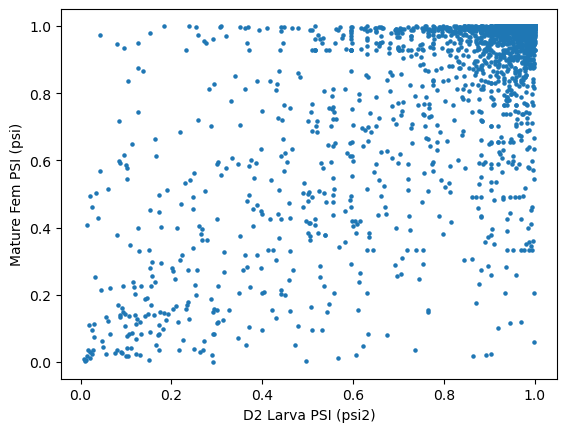

In [54]:
plt.scatter(data.SE.psi2, data.SE.psi1, s=5)
plt.xlabel('D2 Larva PSI (psi2)')
plt.ylabel('Mature Fem PSI (psi)')


Text(0.5, 0, 'Average IJC + SJC (log10)')

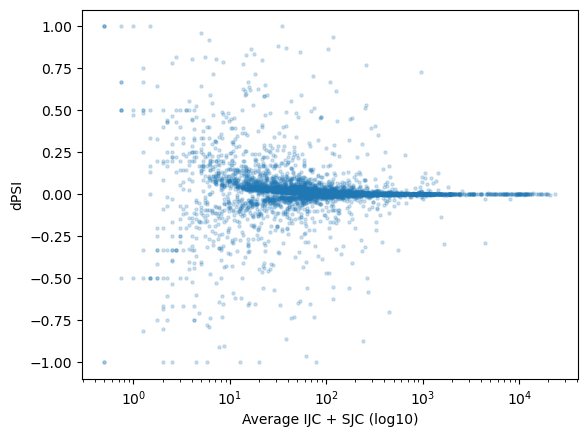

In [8]:
sig=data.SE.fdr<.1
plt.scatter(data.SE.orig.totalreads, data.SE.orig.dpsi, s=5, alpha=.2)
plt.xscale('log')
plt.ylabel('dPSI')
plt.xlabel('Average IJC + SJC (log10)')


In [9]:
#Try shrinkage

In [10]:
from spliceformats.shrinkage import shrink_rMATS

corr_data=shrink_rMATS(data)


Text(0, 0.5, 'Mature Fem PSI (psi1)')

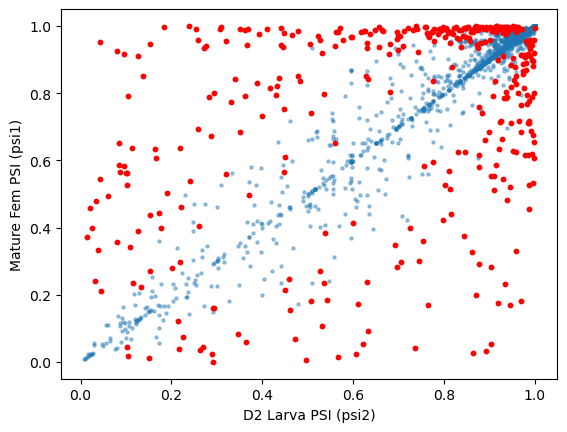

In [53]:
sig=data.SE.fdr<.1
plt.scatter(corr_data.SE.psi2, corr_data.SE.psi1, s=5, alpha=.4)
plt.scatter(corr_data.SE.psi2[sig], corr_data.SE.psi1[sig], s=10, c='r', label='sig')
plt.xlabel('D2 Larva PSI (psi2)')
plt.ylabel('Mature Fem PSI (psi1)')


Text(0.5, 0, 'Average IJC + SJC (log10)')

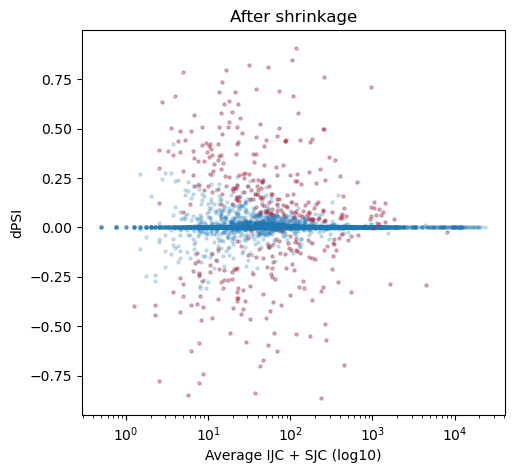

In [13]:
#See shrinkage effect
plt.figure(figsize=(12,5))
ax=plt.subplot(121,)
plt.title('After shrinkage')
plt.scatter(corr_data.SE.totalreads, corr_data.SE.dpsi, s=5,alpha=.2)
plt.scatter(corr_data.SE.totalreads[sig], corr_data.SE.dpsi[sig], c='r', s=5, alpha=.2,label='Sig')
plt.xscale('log')
plt.ylabel('dPSI')
plt.xlabel('Average IJC + SJC (log10)')


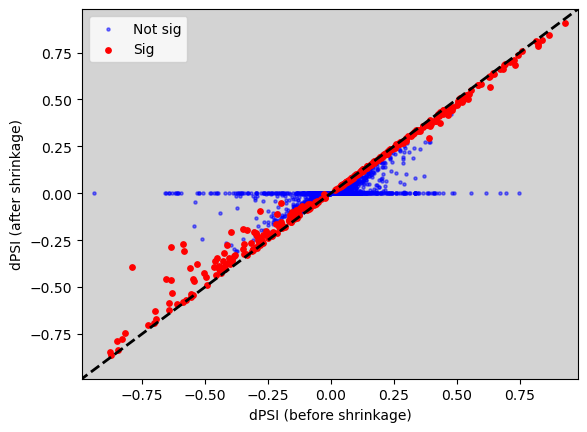

In [17]:
plt.scatter(data.SE.dpsi,corr_data.SE.dpsi, s=5, c='b',alpha=.5, label='Not sig')
plt.gca().set_facecolor('lightgrey')
plt.scatter(data.SE.dpsi[sig],corr_data.SE.dpsi[sig], s=15,c='r', label='Sig')
plt.ylabel('dPSI (after shrinkage)')
plt.xlabel('dPSI (before shrinkage)')
plt.legend()
plt.plot([-1,1],[-1,1], c='black', lw=2, ls='--',)
minval, maxval=np.min(data.SE.dpsi), np.max(data.SE.dpsi)
xlim=plt.xlim(minval-.05,maxval+.05)
ylim=plt.ylim(minval-.05,maxval+.05)


In [34]:
sig=data.SE.fdr<.1
sig_data = data.SE.df[sig]

In [46]:
#events = ['A3SS','A5SS','SE','MXE','RI']

s = data.A3SS.fdr<0.1
print('A3SS'+' sig events: '+str(len(data.A3SS.df[s])))

s = data.A5SS.fdr<0.1
print('A5SS'+' sig events: '+str(len(data.A5SS.df[s])))

s = data.SE.fdr<0.1
print('SE'+' sig events: '+str(len(data.SE.df[s])))

s = data.MXE.fdr<0.1
print('MXE'+' sig events: '+str(len(data.MXE.df[s])))

s = data.RI.fdr<0.1
print('RI'+' sig events: '+str(len(data.RI.df[s])))

A3SS sig events: 103
A5SS sig events: 91
SE sig events: 370
MXE sig events: 137
RI sig events: 68


In [49]:
c_hem_nr_t2g = pd.read_csv('/home/tchari/clytia_alt_splice/reference/c_hem_nr_t2g.csv')
c_hem_nr_t2g.head()

,0,1,2,3,4,5,6,7,8,9
0,XLOC_019238,MSTRG.1,MSTRG.1.1.p1,MSTRG.1~~MSTRG.1.1.p1,NaN,ORF,type:complete,len:362,"(+),score=61.36",MSTRG.1.1:22-1107(+)
1,MASFYTPRKKTKMADNPGDIEITGYVNYVGPRKTSYFEVYLCDETK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSTRG.10,MSTRG.10.1.p1,MSTRG.10~~MSTRG.10.1.p1,NaN,ORF,type:complete,len:191,"(+),score=14.04",MSTRG.10.1:367-939(+),NaN
3,MIEDKITEEKSQKRLKLEKVTLTSNANQQQFDFNKQVIDIIEKSER...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XLOC_004572,MSTRG.100,MSTRG.100.1.p1,MSTRG.100~~MSTRG.100.1.p1,NaN,ORF,type:complete,len:602,"(+),score=115.30,Y_phosphatase|PF00102.24|6.3e...",MSTRG.100.1:124-1929(+)


In [71]:
#SE sig genes
xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(list(sig_data.GeneID))])
gIds = list(c_hem_nr_t2g['1'][c_hem_nr_t2g['1'].isin(list(sig_data.GeneID))])
len(xlocs)

281

In [77]:
#Get annotations
import requests
from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
    url = 'https://api.datacite.org/dois/'+doi+'/media'
    r = requests.get(url).json()
    netcdf_url = r['data'][0]['attributes']['url']
    r = requests.get(netcdf_url,stream=True)
    #Set file name
    fname = doi.split('/')[-1]+ext
    #Download file with progress bar
    if r.status_code == 403:
        print("File Unavailable")
    if 'content-length' not in r.headers:
        print("Did not get file")
    else:
        with open(fname, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            #pbar = tnrange(int(total_length/1024), unit="B")
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    #pbar.update()
                    f.write(chunk)
        return fname
     

In [78]:
#Human ortholog annotations
download_file('10.22002/D1.1819','.gz')

#Panther annotations
download_file('10.22002/D1.1820','.gz')

#GO Terms
download_file('10.22002/D1.1822','.gz')

'D1.1822.gz'

In [80]:
!gunzip *D1*.gz

In [81]:
#Read in annotations
from io import StringIO

hg_ortho_df = pd.read_csv(StringIO(''.join(l.replace('|', '\t') for l in open('D1.1819'))),
            sep="\t",header=None,skiprows=[0,1,2,3])

hg_ortho_df[['XLOC','TCONS']] = hg_ortho_df[13].str.split(expand=True)
hg_ortho_df[['Gene','gi']] = hg_ortho_df[3].str.split(expand=True)
hg_ortho_df['Description']= hg_ortho_df[11]


panther_df = pd.read_csv('D1.1820',
            sep="\t",header=None) #skiprows=[0,1,2,3]



goTerm_df = pd.read_csv('D1.1822',
            sep=" ",header=None) #skiprows=[0,1,2,3]

In [91]:
sub_df = hg_ortho_df[hg_ortho_df.XLOC.isin(xlocs)]
panth_df = panther_df[panther_df[0].isin(xlocs)]
go_df = goTerm_df[goTerm_df[0].isin(xlocs)]


In [95]:
sub_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
132,258,20119,Hs,FRG1 gi,4758404,ref,NP_004468.1,gi,4758404,ref,...,g.68355 ORF TCONS_00055929,g.68355 TCONS_00055929,m.68355 type:complete len:284 (+) TCONS_000559...,many:1,34744.0,XLOC_035216,TCONS_00055929,FRG1,gi,protein FRG1 [Homo sapiens]
138,269,21701,Hs,XPA gi,767958213,ref,XP_011517290.1,gi,767958213,ref,...,g.73404 ORF TCONS_00060097,g.73404 TCONS_00060097,m.73404 type:complete len:273 (+) TCONS_000600...,1:1,17261.0,XLOC_037812,TCONS_00060097,XPA,gi,PREDICTED: DNA repair protein complementing X...
290,708,18526,Hs,SRSF4 gi,21361282,ref,NP_005617.2,gi,21361282,ref,...,g.62928 ORF TCONS_00051515,g.62928 TCONS_00051515,m.62928 type:complete len:481 (+) TCONS_000515...,1:1,NaN,XLOC_032647,TCONS_00051515,SRSF4,gi,serine/arginine-rich splicing factor 4 [Homo ...
292,710,9573,Hs,SRSF6 gi,20127499,ref,NP_006266.2,gi,20127499,ref,...,g.36685 ORF TCONS_00026177,g.36685 TCONS_00026177,m.36685 type:complete len:302 (+) TCONS_000261...,1:1,17177.0,XLOC_014721,TCONS_00026177,SRSF6,gi,serine/arginine-rich splicing factor 6 [Homo ...
295,711,17434,Hs,SRSF1 gi,5902076,ref,NP_008855.1,gi,5902076,ref,...,g.58757 ORF TCONS_00048539,g.58757 TCONS_00048539,m.58757 type:complete len:205 (+) TCONS_000485...,many:many,NaN,XLOC_030861,TCONS_00048539,SRSF1,gi,serine/arginine-rich splicing factor 1 isofor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,19832,22671,Hs,RBM10 gi,325120986,ref,NP_001191397.1,gi,325120986,ref,...,g.76764 ORF TCONS_00062725,g.76764 TCONS_00062725,m.76764 type:5prime_partial len:680 (+) TCONS_...,many:1,NaN,XLOC_039298,TCONS_00062725,RBM10,gi,RNA-binding protein 10 isoform 5 [Homo sapiens]
7407,19898,17081,Hs,GOLGA2 gi,530390995,ref,XP_005251987.1,gi,530390995,ref,...,g.57434 ORF TCONS_00047535,g.57434 TCONS_00047535,m.57434 type:complete len:1055 (+) TCONS_00047...,1:1,4358.0,XLOC_030278,TCONS_00047535,GOLGA2,gi,PREDICTED: golgin subfamily A member 2 isofor...
7410,19900,1926,Hs,GOLGA4 gi,530372318,ref,XP_005265126.1,gi,530372318,ref,...,g.7024 ORF TCONS_00005056,g.7024 TCONS_00005056,m.7024 type:complete len:1709 (+) TCONS_000050...,1:1,NaN,XLOC_002864,TCONS_00005056,GOLGA4,gi,PREDICTED: golgin subfamily A member 4 isofor...
7427,19939,11384,Hs,CD2AP gi,11321634,ref,NP_036252.1,gi,11321634,ref,...,g.42407 ORF TCONS_00031131,g.42407 TCONS_00031131,m.42407 type:complete len:641 (+) TCONS_000311...,many:1,24516.0,XLOC_017924,TCONS_00031131,CD2AP,gi,CD2-associated protein [Homo sapiens]
